# Credit Card Fraud Detection Project

The objective of this project is to detect fraudulent transactions and identify individual fraudulent customers. The dataset contains credit card transactions made by European cardholders in September 2013. The dataset covers a period of 48 hours (2 days) with a total of 284,807 transactions.

The features V1, V2, …, V28 in the dataset represent principal components obtained through PCA (Principal Component Analysis). The remaining columns are ‘Time’, which indicates the seconds elapsed between transactions, and ‘Amount’, representing the transaction amount. Now, let’s delve into the project.

## Step 1: Data Cleaning and initial analysis

In [1]:
#Libraries.
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [3]:
#Load the data and inspect it. 
transaction_data= pd.read_csv('creditcard.csv')
transaction_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [535]:
#Data cleaning and preprocessing

#Dropping the null values if exist.
transaction_data.dropna(inplace=True)

# Drop duplicate values if exist.
transaction_data.drop_duplicates(inplace=True)

#Make sure the principal components from V1 to V28 are also normalized
pca_features = [f'V{i}' for i in range(1,29)]
transaction_data[pca_features] = scaler.fit_transform(transaction_data[pca_features])

transaction_data = transaction_data.sort_values(by = 'Time')


In [546]:
#Checking the information of our data after cleaning.
print(transaction_data.shape)
print(transaction_data.describe())

(283726, 31)
                Time            V1            V2            V3            V4  \
count  283726.000000  2.837260e+05  2.837260e+05  2.837260e+05  2.837260e+05   
mean    94811.077600 -5.589658e-17 -8.013847e-19 -1.378382e-16  2.163739e-17   
std     47481.047891  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min         0.000000 -2.895933e+01 -4.415594e+01 -3.203279e+01 -4.016602e+00   
25%     54204.750000 -4.732329e-01 -3.620488e-01 -5.907784e-01 -5.990519e-01   
50%     84692.500000  7.426456e-03  4.134568e-02  1.182157e-01 -1.363454e-02   
75%    139298.000000  6.725541e-01  4.885028e-01  6.796321e-01  5.251188e-01   
max    172792.000000  1.257179e+00  1.339762e+01  6.217985e+00  1.193504e+01   

                 V5            V6            V7            V8            V9  \
count  2.837260e+05  2.837260e+05  2.837260e+05  2.837260e+05  2.837260e+05   
mean   3.445954e-17  3.205539e-18 -2.283946e-17 -1.312267e-17 -1.940854e-17   
std    1.000002e+00  1.000002

Now, wer are considering 'V1' from our dataset as the customer ID and plotting the result for our analysis. 

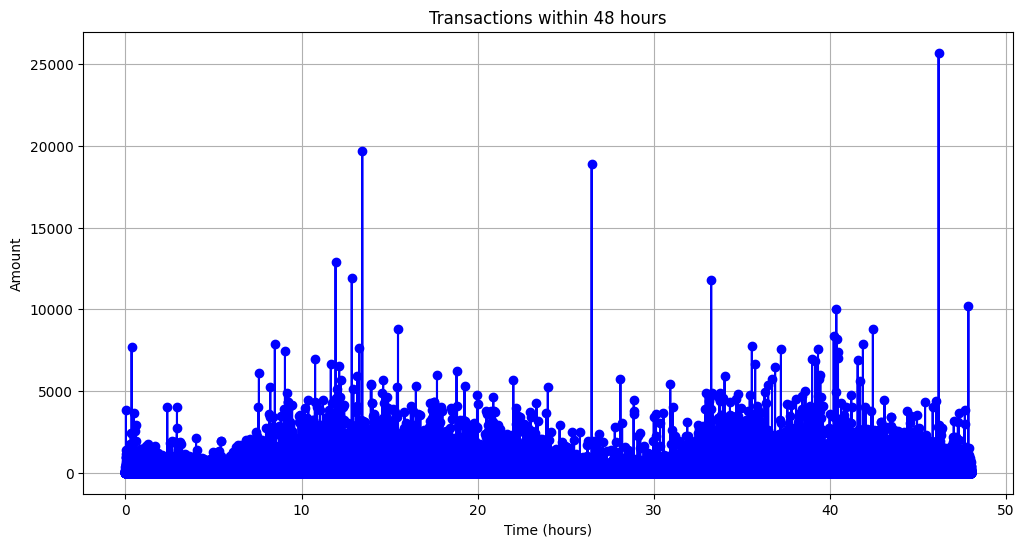

In [547]:
#Extracting the important features for our calculation.
important_columns = transaction_data.loc[:, ['Time', 'V1', 'Amount']]

important_columns['Time(hours)'] = important_columns['Time'] / 3600

# Plotting the cumulative line graph
plt.figure(figsize=(12, 6))
plt.plot(important_columns['Time(hours)'], important_columns['Amount'], marker='o', linestyle='-', color='b')
plt.title('Transactions within 48 hours')
plt.xlabel('Time (hours)')
plt.ylabel('Amount')
plt.grid(True)
plt.show()


From this figure, we can see that about 75% of the total transactions are done within the time frame of 48 hours. Thus, this analysis can help us later to determine the threshold amount for defining our compliance rules. 

In [548]:
#Convert the time from seconds to hours
important_columns['Hour'] = important_columns['Time'] // 3600
hourly_data = important_columns.groupby('Hour').sum().reset_index()
hourly_data

,Hour,Time,V1,Amount,Time(hours)
0,0.0,6.422371e+06,-672.408395,256354.95,1783.991944
1,1.0,1.092411e+07,-182.347096,146043.52,3034.476111
2,2.0,1.412918e+07,-410.691445,108813.17,3924.773611
3,3.0,2.189172e+07,-40.175608,94303.84,6081.032222
4,4.0,1.698710e+07,-55.690519,79840.62,4718.640000
5,5.0,3.331923e+07,-46.776874,77103.95,9255.341389
6,6.0,4.259916e+07,-321.259907,141914.10,11833.099444
7,7.0,9.149248e+07,-567.806294,273279.53,25414.577500
8,8.0,1.581195e+08,-561.170035,469095.70,43922.088889
9,9.0,2.681559e+08,-456.822279,799493.19,74487.750556


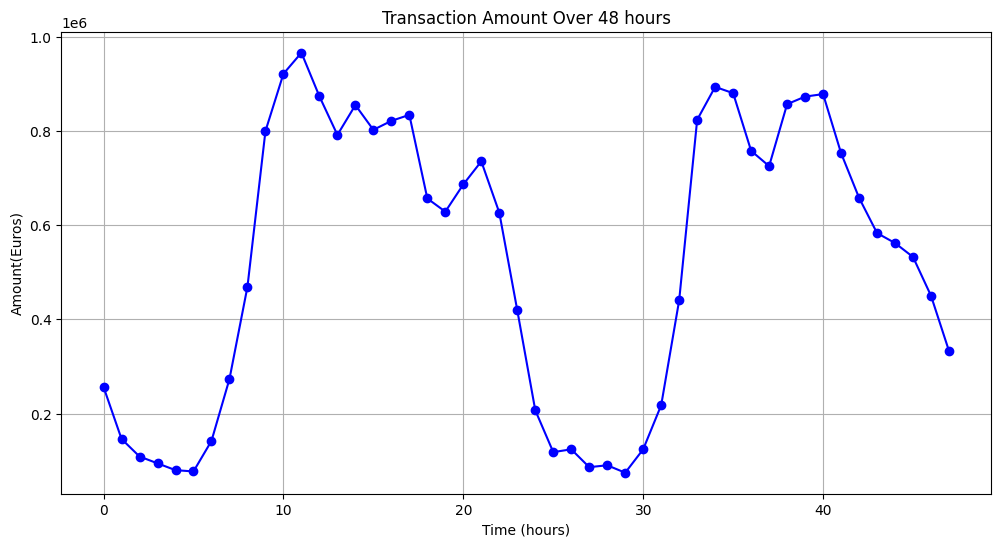

In [549]:
#Simple visualization of our total dataset graphically. 

plt.figure(figsize = (12,6))
plt.plot(hourly_data['Hour'], hourly_data['Amount'], marker='o', linestyle='-', color='b')
plt.title('Transaction Amount Over 48 hours')
plt.xlabel('Time (hours)')
plt.ylabel('Amount(Euros)')
plt.grid(True)
plt.show()

After grouping our dataset on an hourly basis and doing further analysis, we can see in our graph that most of the transactions are carried out during the daytime. From 7 AM in the morning to 10 PM in the evening, most of the transactions are carried out. However, there are fewer transactions carried out at night, i.e. between 10 PM and 7 AM. Also, we can see that the transactions generally reach their peak between 10 - 11 AM. A decreasing trend in the transactions can be analyzed between 11 AM to 1 PM. It might reflect that the transaction fluctuated during the break time of the day as well.

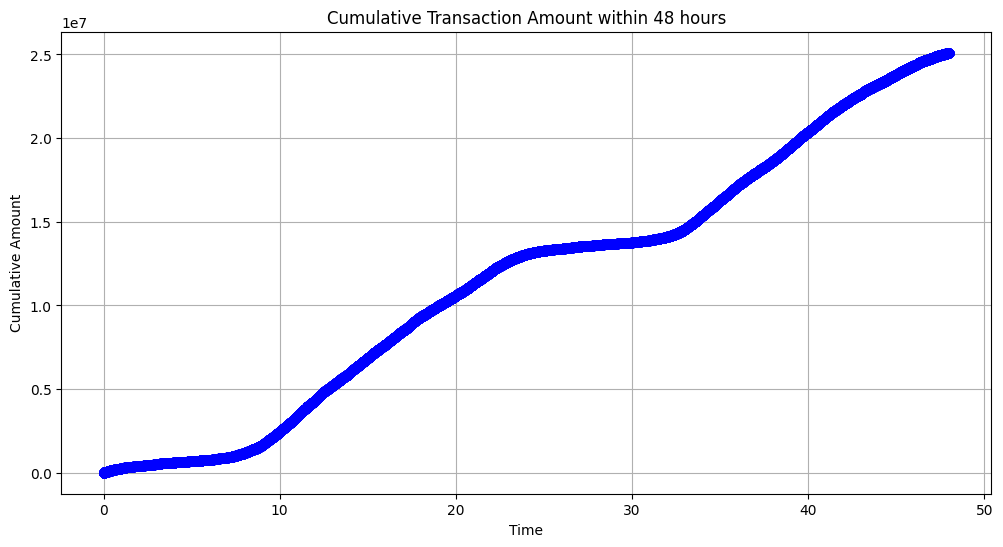

In [550]:
# Calculate the cumulative sum of the Amount within 2 days
important_columns['Cumulative Amount'] = important_columns['Amount'].cumsum()
important_columns['Time(hours)'] = important_columns['Time'] / 3600

# Plotting the cumulative line graph
plt.figure(figsize=(12, 6))
plt.plot(important_columns['Time(hours)'], important_columns['Cumulative Amount'], marker='o', linestyle='-', color='b')
plt.title('Cumulative Transaction Amount within 48 hours')
plt.xlabel('Time')
plt.ylabel('Cumulative Amount')
plt.grid(True)
plt.show()

Our initial analysis is further supported by the graph of Cumulative Amount versus Time. We can see here as well that the transactions between 0 - 7 AM are low, the transaction increases between 7 - 22, and stabilizes at night, between 22 - 7. Again, the same process repeats in the morning. 

## Step 2: Developing Monitoring Rules

In [559]:
#Rule 1: Threshold rules. 
def threshold_rule(transactions_data, threshold_amount, individual_threshold_amount, threshold_period_seconds):
    """
    Flag customers whose transaction amounts exceed the overall threshold within a threshold period,
    and among those, flag those who exceed their individual threshold within the same period.
    """
    flagged_customers = []  # Storing flagged customer IDs

    # Identify customers who exceed the overall threshold within the period
    overall_flagged_customers = set()
    
    for index, transaction in transactions_data.iterrows():
        current_time = transaction['Time']

        # Filter transactions within the threshold period
        start_time = current_time - threshold_period_seconds
        recent_transactions = transactions_data[(transactions_data['Time'] >= start_time) & (transactions_data['Time'] <= current_time)]

        # Calculate the total transaction amount within the threshold period
        total_amount = recent_transactions['Amount'].sum()

        # Apply the condition of flagging the transactions
        if total_amount > threshold_amount:
            overall_flagged_customers.update(recent_transactions['V1'].unique())

    # Check individual thresholds among the flagged customers
    for customer_id in overall_flagged_customers:
        customer_transactions = transactions_data[transactions_data['V1'] == customer_id].sort_values(by='Time')

        for index, transaction in customer_transactions.iterrows():
            current_time = transaction['Time']
            start_time = current_time - threshold_period_seconds
            recent_transactions = customer_transactions[(customer_transactions['Time'] >= start_time) & (customer_transactions['Time'] <= current_time)]

            # Calculate the total transaction amount for the customer within the threshold period
            total_amount = recent_transactions['Amount'].sum()

            if total_amount > individual_threshold_amount:
                flagged_customers.append(customer_id)
                break  # Exit the loop once the customer is flagged

    return flagged_customers

# Example usage
threshold_amount = 8000  # Example overall threshold amount
individual_threshold_amount = 4000  # Example individual threshold amount
threshold_period_seconds = 3600  # Example threshold period in seconds (1 hour)

# #Take 10% for the data for inital anaysis.
# test_data = important_columns.head(28372).copy()

flagged_customers_threshold = threshold_rule(important_columns, threshold_amount, individual_threshold_amount, threshold_period_seconds)
print("Flagged Customers by threshold rule:", flagged_customers_threshold)

# Print the details of the flagged customers
flagged_customers_threshold_details = important_columns[important_columns['V1'].isin(flagged_customers_threshold)]
flagged_customers_threshold_details

Flagged Customers by threshold rule: [-2.568280898003389, -5.683683155031396, -4.801862396447662, -13.807069512258062, -3.811339570834211, -3.9528903003769993, -8.834219066577349, -1.9706592565769414, 0.01817741900414688, -5.134962747155178, -6.080863468025866, -5.880171518021018, -6.952371687116946, -11.05654188520046, -6.480583168439098, -6.820488988179223, -3.3763739913128696, -1.312863519033152, -1.5269302304648584, -5.6242104386610645, -10.157244365268484, -17.738609044945136, -5.347056079042161, -2.4409745507930447, -3.9462540958242687, -7.519227882122567, -3.661583567967096, -4.441426722640991, -2.936938449610472, -3.76026791019667, -5.81241920659516, -7.041325860490523, -4.865242508946657, -6.727601418403474, -8.704200796161945, -6.45315173960323, -16.708766629367503, -6.88022654655735, -3.4315237806454424, -2.9416367766050064, -3.8553145581691086, -14.51147969456762, -3.5319088061272987, -3.3451651885374436, -11.917478731704625, -5.012858348863038, -1.9246305742877805, -3.1014

,Time,V1,Amount,Time(hours),Hour,Cumulative Amount
1632,1264.0,-5.722019,7712.43,0.351111,0.0,1.196957e+05
6783,8544.0,-3.376374,4002.88,2.373333,2.0,4.416661e+05
15835,27283.0,-5.347056,6130.21,7.578611,7.0,1.047266e+06
18570,29601.0,-2.936938,5239.50,8.222500,8.0,1.278231e+06
19760,30537.0,-7.288287,7879.42,8.482500,8.0,1.388220e+06
...,...,...,...,...,...,...
250924,155131.0,-3.389519,4465.04,43.091944,43.0,2.270194e+07
268880,163427.0,-3.247519,4323.08,45.396389,45.0,2.401776e+07
273747,165682.0,-3.167323,4361.17,46.022778,46.0,2.433344e+07
274771,166198.0,-18.251562,25691.16,46.166111,46.0,2.443217e+07


In [558]:
def frequency_rule(transactions_data, max_trans_per_period, individual_threshold_amount, threshold_period_seconds):
    """
    Flag customers whose transaction frequencies exceed the specified threshold within a threshold period,
    and among those, flag those who exceed their individual transaction amount threshold within the same period.
    """
    flagged_customers = []  # Storing flagged customer IDs
    
    # Group transactions by customer ID and time period
    grouped_data = transactions_data.groupby(['V1', transactions_data['Time'] // threshold_period_seconds])

    # Iterate over each group
    for (customer_id, period_start), group in grouped_data:
        # Calculate total transactions and amount directly from the group
        total_transactions = group.shape[0]  # Number of transactions
        total_amount = group['Amount'].sum()  # Total transaction amount
        
        # Check if transactions exceed the threshold frequency
        if total_transactions > max_trans_per_period:
            # Check if total amount exceeds the individual threshold
            if total_amount > individual_threshold_amount:
                flagged_customers.append(customer_id)

    return flagged_customers

# Example usage
max_trans_per_period = 5  # Example maximum transactions per period threshold
individual_threshold_amount = 500  # Example individual transaction amount threshold
threshold_period_seconds = 3600  # Example threshold period in seconds (1 hour)

flagged_customers_freq = frequency_rule(important_columns, max_trans_per_period, individual_threshold_amount, threshold_period_seconds)
print("Flagged Customers by Frequency Rule:", flagged_customers_freq)

# Print the details of the flagged customers
flagged_customers_freq_details = important_columns[important_columns['V1'].isin(flagged_customers_freq)]
flagged_customers_freq_details

Flagged Customers by Frequency Rule: [0.01817741900414688, 0.44747779331502524, 0.4483408961535914, 0.4582580689326147, 0.4582580689326147, 0.5568459449845574, 0.5667631177635813, 0.9167683604585302, 0.9401728882170246]


,Time,V1,Amount,Time(hours),Hour,Cumulative Amount
10989,18921.0,0.458258,89.99,5.255833,5.0,7.047757e+05
11005,18966.0,0.458258,89.99,5.268333,5.0,7.051842e+05
11019,18994.0,0.458258,89.99,5.276111,5.0,7.073988e+05
11028,19019.0,0.458258,89.99,5.283056,5.0,7.083069e+05
11044,19053.0,0.458258,89.99,5.292500,5.0,7.102065e+05
...,...,...,...,...,...,...
261179,159899.0,0.916768,144.00,44.416389,44.0,2.343668e+07
261589,160088.0,0.916768,144.00,44.468889,44.0,2.346745e+07
261770,160174.0,0.916768,144.00,44.492778,44.0,2.348023e+07
262012,160271.0,0.916768,144.00,44.519722,44.0,2.350430e+07


In [601]:

important_columns


,Time,V1,Amount,Time(hours),Hour,Cumulative Amount,class_new
0,0.0,-0.701082,149.62,0.000000,0.0,1.496200e+02,0
1,0.0,0.608792,2.69,0.000000,0.0,1.523100e+02,0
2,1.0,-0.700336,378.66,0.000278,0.0,5.309700e+02,0
3,1.0,-0.499064,123.50,0.000278,0.0,6.544700e+02,0
4,2.0,-0.597606,69.99,0.000556,0.0,7.244600e+02,0
...,...,...,...,...,...,...,...
284802,172786.0,-6.102103,0.77,47.996111,47.0,2.510168e+07,0
284803,172787.0,-0.379208,24.79,47.996389,47.0,2.510171e+07,0
284805,172788.0,-0.126465,10.00,47.996667,47.0,2.510172e+07,0
284804,172788.0,0.982354,67.88,47.996667,47.0,2.510178e+07,0


After developing the threshold rule and frequency rule, we analyzed that 137 customers were detected fraudulent according to the threshold rule, and 116 customers were detected fraudulent according to the frequency rule. 

## Step 3: Final Analsysis of Fraudulent Customers. 

In [604]:

# Combine flagged customers from both rules
combined_flagged_customers = set(flagged_customers_threshold + flagged_customers_freq)
print("Total flagged customers:", len(combined_flagged_customers))

# Drop the column 'class_new' if it already exists to avoid duplicates
if 'class_new' in important_columns.columns:
    important_columns.drop('class_new', axis=1, inplace=True)

# Create a new column 'class_new' with initialization 0
important_columns['class_new'] = 0

# Set 'class_new' to 1 for the flagged customers
important_columns.loc[important_columns['V1'].isin(combined_flagged_customers), 'class_new'] = 1

Total flagged customers: 129


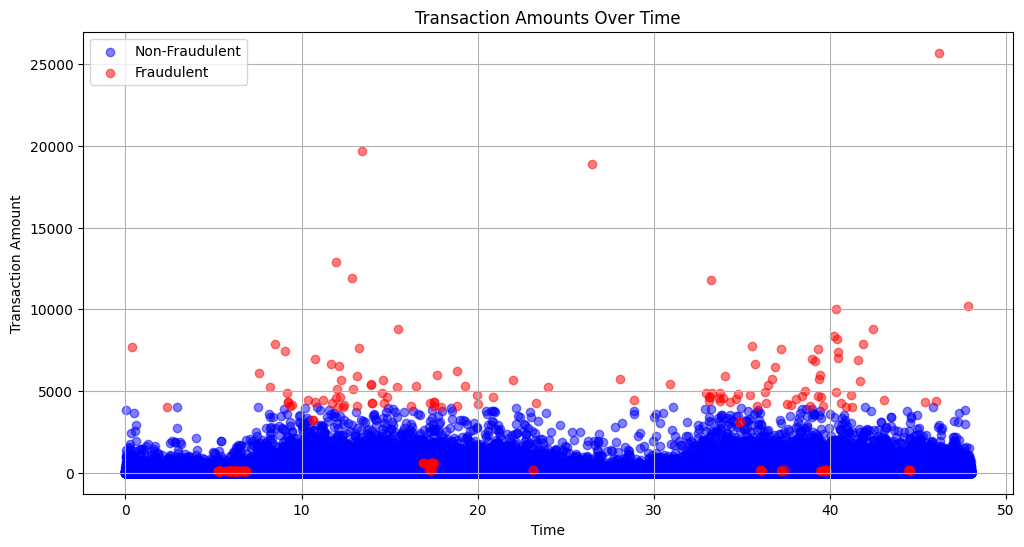

In [609]:
# Plotting the scatter plot
plt.figure(figsize=(12, 6))

# Scatter plot for non-fraudulent transactions
non_fraudulent = important_columns[important_columns['class_new'] == 0]
plt.scatter(non_fraudulent['Time'] / 3600, non_fraudulent['Amount'], color='blue', label='Non-Fraudulent', alpha=0.5)

# Scatter plot for fraudulent transactions
fraudulent = important_columns[important_columns['class_new'] == 1]
plt.scatter(fraudulent['Time'] / 3600, fraudulent['Amount'], color='red', label='Fraudulent', alpha=0.5)

plt.title('Transaction Amounts Over Time')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.legend()
plt.grid(True)
plt.show()

In our final graph, it can be seen that most of the fraudulent customers are detected by our threshold rule. The customers exceeding their threshold amount of €4000 and an overall threshold amount of €8000 within the time frame of 1 hour are detected as fraudulent. They lie above the threshold amount of €4000. However, we can also see that some fraudulent customers are around the base region. Actually, they are the ones who violated the frequency rule. They exceed the maximum allowed transactions, which is 5, within the threshold period of 1 hour. Also, the sum of their transaction exceeded the individual total threshold of €500.

Thus, the goal of this project to detect fraudulent transactions and customers is achieved. 
